# Libraries

In [1]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import LabelEncoder
import numpy as np
import ipywidgets as widgets



# Generate Random Data

In [2]:
#these functions generate data for students, rooms and teachers
def generate_student_data(num_students):
    student_ids = list(range(1, num_students + 1))
    batches = np.random.choice([19, 20, 21, 22, 23], size=num_students)
    domains = np.random.choice(['Computer Science', 'Artificial Intelligence', 'Business Analytics', 'Software Engineering', 'Electrical Engineering'], size=num_students)
    
    student_data = pd.DataFrame({
        'Student_ID': student_ids,
        'Batch': batches,
        'Domain': domains
    })
    
    return student_data

def generate_room_capacity(num_rooms):
    room_capacity_list = []
    for i in range(1, num_rooms + 1):
        capacity = np.random.randint(30, 35)  # Random capacity between 20 and 30
        room_capacity_list.append({'Room_ID': i, 'Capacity': capacity})
    room_capacity_df = pd.DataFrame(room_capacity_list)
    return room_capacity_df

def generate_teacher_data(num_teachers):
    teacher_ids = list(range(1, num_teachers + 1))
    domains = np.random.choice(['Computer Science', 'Artificial Intelligence', 'Business Analytics', 'Software Engineering', 'Electrical Engineering'], size=num_teachers)
    
    teacher_data = pd.DataFrame({
        'Teacher_ID': teacher_ids,
        'Domain': domains
    })
    
    return teacher_data

num_teachers = 60
num_students = 2500
num_rooms = 30
student_df = generate_student_data(num_students)
room_capacity_df = generate_room_capacity(num_rooms)
teacher_df = generate_teacher_data(num_teachers)




# Save data to files

In [3]:

student_df.to_csv('student_data.csv', index=False)
room_capacity_df.to_csv('room_capacity.csv', index=False)
teacher_df.to_csv('teacher_data.csv', index=False)

# Read data from files

In [4]:
student_df = pd.read_csv('student_data.csv')
room_capacity_df = pd.read_csv('room_capacity.csv')
teacher_df=pd.read_csv('teacher_data.csv')

# Preprocess Data

In [5]:
domain_map = {'Computer Science': 0, 'Artificial Intelligence': 1, 'Business Analytics': 2, 'Software Engineering': 3, 'Electrical Engineering': 4}
for domain, domain_code in domain_map.items():
    domain_students = student_df[student_df['Domain'] == domain]
    if len(domain_students) > 0:
        # Encode batches
        batch_encoded = pd.get_dummies(domain_students['Batch'], prefix='Batch')
        # Encode domain
        domain_students['Encoded_Domain'] = domain_code

C:\Users\Hp\AppData\Local\Temp\ipykernel_556\2537263665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_students['Encoded_Domain'] = domain_code
C:\Users\Hp\AppData\Local\Temp\ipykernel_556\2537263665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_students['Encoded_Domain'] = domain_code
C:\Users\Hp\AppData\Local\Temp\ipykernel_556\2537263665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Elbow Method to determine number of clusters

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

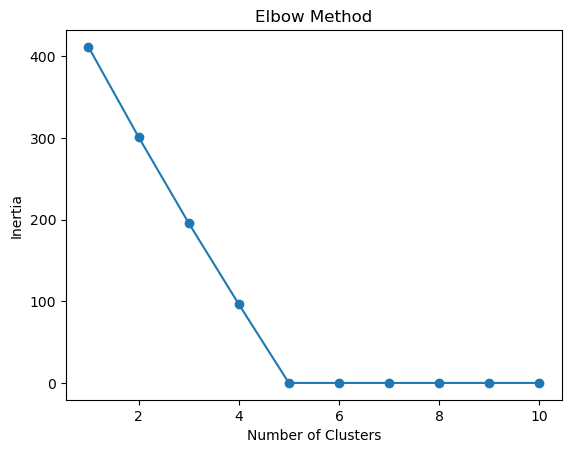

In [6]:

# Concatenate encoded domain and batch features
features = pd.concat([domain_students['Encoded_Domain'], batch_encoded], axis=1)
# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features)

# Apply KMeans with different numbers of clusters
inertia_values = []
for k in range(1, 11):  # Try different values of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# kmeans clustering

In [7]:
def perform_kmeans_clustering(student_df):
    
    # Initialize final cluster labels
    final_cluster_labels = np.zeros(len(student_df))
    cluster_offset = 0
    
    # Map domains to numeric values
    domain_map = {'Computer Science': 0, 'Artificial Intelligence': 1, 'Business Analytics': 2, 'Software Engineering': 3, 'Electrical Engineering': 4}
    for domain, domain_code in domain_map.items():
        domain_students = student_df[student_df['Domain'] == domain]
        if len(domain_students) > 0:
            # Encode batches
            batch_encoded = pd.get_dummies(domain_students['Batch'], prefix='Batch')
            
            # Encode domain
            domain_students['Encoded_Domain'] = domain_code
            
            # Concatenate encoded domain and batch features
            features = pd.concat([domain_students['Encoded_Domain'], batch_encoded], axis=1)
            
            # Perform clustering
            kmeans = KMeans(n_clusters=5, random_state=42)
            cluster_labels = kmeans.fit_predict(features)
            final_cluster_labels[domain_students.index] = cluster_labels + cluster_offset
            cluster_offset += max(cluster_labels) + 1
    
    return final_cluster_labels.astype(int)


# Cluster visualization code

In [8]:
def visualize_clusters(student_df, cluster_labels):
    """
    Visualize clusters of students.

    Parameters:
        student_df (pandas.DataFrame): DataFrame containing student data.
        cluster_labels (numpy.ndarray): Array containing cluster labels.
    """
    # Plot clusters
    plt.figure(figsize=(10, 6))
    for cluster_label in set(cluster_labels):
        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        plt.scatter(student_df.loc[cluster_indices, 'Encoded_Domain'], student_df.loc[cluster_indices, 'Batch'], label=f'Cluster {cluster_label}')
    
    plt.xlabel('Domain')
    plt.ylabel('Batch')
    plt.title('Clusters of Students')
    plt.legend()
    plt.show()


# perform clustering and visualization

C:\Users\Hp\AppData\Local\Temp\ipykernel_556\1761525176.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_students['Encoded_Domain'] = domain_code
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Local\Temp\ipykernel_556\1761525176.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni


Clusters:
Cluster 0:
  Student ID: 23,    Domain: Computer Science,    Batch: 20
  Student ID: 35,    Domain: Computer Science,    Batch: 20
  Student ID: 49,    Domain: Computer Science,    Batch: 20
  Student ID: 63,    Domain: Computer Science,    Batch: 20
  Student ID: 71,    Domain: Computer Science,    Batch: 20
  Student ID: 83,    Domain: Computer Science,    Batch: 20
  Student ID: 86,    Domain: Computer Science,    Batch: 20
  Student ID: 97,    Domain: Computer Science,    Batch: 20
  Student ID: 131,    Domain: Computer Science,    Batch: 20
  Student ID: 174,    Domain: Computer Science,    Batch: 20
  Student ID: 186,    Domain: Computer Science,    Batch: 20
  Student ID: 212,    Domain: Computer Science,    Batch: 20
  Student ID: 218,    Domain: Computer Science,    Batch: 20
  Student ID: 231,    Domain: Computer Science,    Batch: 20
  Student ID: 263,    Domain: Computer Science,    Batch: 20
  Student ID: 303,    Domain: Computer Science,    Batch: 20
  Student 

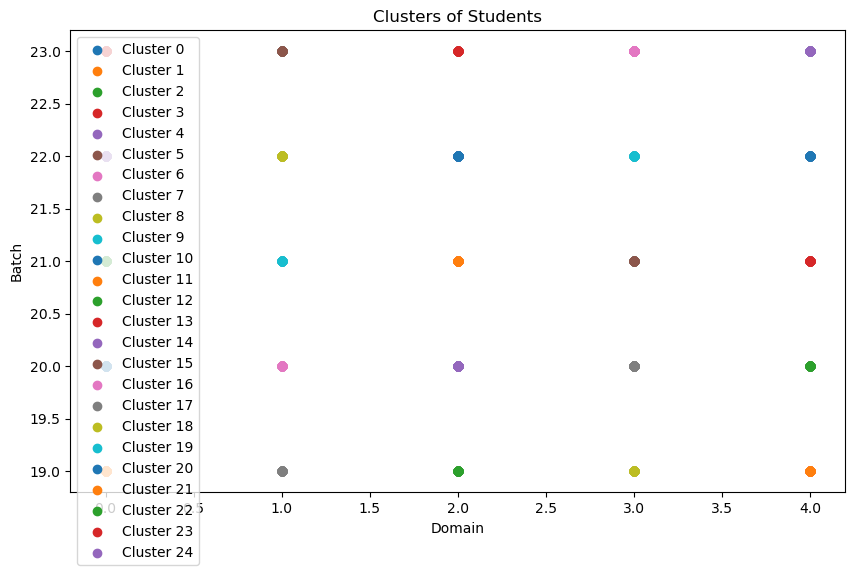

In [9]:

cluster_labels = perform_kmeans_clustering(student_df)


domain_map = {'Computer Science': 0, 'Artificial Intelligence': 1, 'Business Analytics': 2, 'Software Engineering': 3, 'Electrical Engineering': 4}
student_df['Encoded_Domain'] = student_df['Domain'].map(domain_map)
student_df['Cluster_Label'] = cluster_labels

print("\nClusters:")
for cluster_label in set(cluster_labels):
    print(f"Cluster {cluster_label}:")
    students_in_cluster = student_df[cluster_labels == cluster_label]
    for student in students_in_cluster.itertuples():
        print(f"  Student ID: {student.Student_ID},    Domain: {student.Domain},    Batch: {student.Batch}")


visualize_clusters(student_df, cluster_labels)

# Assign Courses to each batch in each domain

In [10]:
courses = {
    (19, 'Artificial Intelligence'): 'Linear Algebra',
    (19, 'Business Analytics'): 'Economics',
    (19, 'Software Engineering'): 'Software Design',
    (19, 'Computer Science'): 'Programming Fund.',
    (19, 'Electrical Engineering'): 'Digital Logic Design',
    (20, 'Artificial Intelligence'): 'Machine Learning',
    (20, 'Business Analytics'): 'Business Studies',
    (20, 'Software Engineering'): 'Software Models',
    (20, 'Computer Science'): 'Theory of Automata',
    (20, 'Electrical Engineering'): 'Circuits',
    (21, 'Artificial Intelligence'): 'Neaural Network',
    (21, 'Business Analytics'): 'Marketing',
    (21, 'Software Engineering'): 'Design Patterns',
    (21, 'Computer Science'): 'OOP',
    (21, 'Electrical Engineering'): 'Components',
    (22, 'Artificial Intelligence'): 'Informed Searches',
    (22, 'Business Analytics'): 'Proposal Writing',
    (22, 'Software Engineering'): 'Mobile Apps',
    (22, 'Computer Science'): 'Gaming',
    (22, 'Electrical Engineering'): 'Chips Studies',
    (23, 'Artificial Intelligence'): 'Differential Equations',
    (23, 'Business Analytics'): 'Market Value',
    (23, 'Software Engineering'): 'SRS document',
    (23, 'Computer Science'): 'PDC',
    (23, 'Electrical Engineering'): 'Electrical Models'
}

In [11]:
student_df['Course'] = ""   # Add 'Course' column to student data
for index, row in student_df.iterrows():   
    batch = row['Batch']
    domain = row['Domain']
    for key, value in courses.items():
        if key == (batch, domain):
            student_df.at[index, 'Course'] = value
            break
        else:
            student_df.at[index, 'Course'] = "Unknown"


# Assign rooms function

In [12]:
from collections import defaultdict

def assign_rooms(cluster_labels, room_capacity_df, student_df):
    room_assignments = defaultdict(list)
    room_counters = room_capacity_df.set_index('Room_ID')['Capacity'].to_dict()
    clusters_to_assign = defaultdict(list)
    day = 1
    current_room_index = 0  # Initialize current room index
    
    # Group students by cluster
    for i, cluster_label in enumerate(cluster_labels):

        clusters_to_assign[cluster_label].append(i)
    
    # Iterate over clusters and assign rooms
    for cluster, students in clusters_to_assign.items():
        remaining_students = students
        
        while remaining_students:
            # Check if there are available rooms for this cluster
            if all(capacity == 0 for capacity in room_counters.values()):
                # If all rooms are filled, move to the next day
                day += 1
                current_room_index = 0  # Reset the current room index
                break
            
            # Check if current_room_index is within bounds
            if current_room_index < len(room_capacity_df):
                # Get the current room ID
                room_id = room_capacity_df.iloc[current_room_index]['Room_ID']
                capacity = room_counters[room_id]
                
                # Assign students to the current room according to room capacity
                assigned_students = remaining_students[:capacity]
                room_assignments[(day, room_id)].extend(assigned_students)
                
                # Update the remaining students for this cluster
                remaining_students = remaining_students[capacity:]
                
                # Update room capacity after assignment
                room_counters[room_id] -= len(assigned_students)
                
                # Move to the next room
                current_room_index += 1
            else:
                break  # Exit the loop if current_room_index is out of bounds
        
        # Move to the next day if there are remaining students for this cluster
        if remaining_students:
            day += 1
            room_counters = room_capacity_df.set_index('Room_ID')['Capacity'].to_dict()

            current_room_index = 0  # Reset the current room index
    
    return room_assignments


In [13]:
room_assignments = assign_rooms(cluster_labels, room_capacity_df,student_df)
print("\nRoom Assignments:")
for (day, room_id), students in room_assignments.items():
    print(f"Day {day}, Room {room_id}:")
    for student_id in students:
        student = student_df.iloc[student_id]
        print(f"  Student ID: {student['Student_ID']},    Course: {student['Course']},    Domain: {student['Domain']},    Batch: {student['Batch']}")



Room Assignments:
Day 1, Room 1:
  Student ID: 1,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 20,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 21,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 38,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 69,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 82,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 118,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 125,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 128,    Course: Differential Equations,    Domain: Artificial Intelligence,    Batch: 23
  Student ID: 194,    Course: Differential Equ

In [14]:
# Convert room assignments dictionary to a list of dictionaries
room_assignment_list = []
for (day, room_id), students in room_assignments.items():
    for student_id in students:
        student = student_df.iloc[student_id]
        room_assignment_list.append({
            'Day': day,
            'Room': room_id,
            'Student_ID': student['Student_ID'],
            'Course': student['Course'],
            'Domain': student['Domain'],
            'Batch': student['Batch']
        })

# Convert the list of dictionaries to a DataFrame
room_assignment_df = pd.DataFrame(room_assignment_list)

# Write DataFrame to CSV file
room_assignment_df.to_csv('room_assignments.csv', index=False)


# Assign teachers to rooms

In [15]:
def assign_teachers_to_rooms(room_assignments, teacher_df, student_df):
    assigned_rooms = {}
    remaining_teachers = teacher_df.copy()  # Make a copy of teachers DataFrame
    previous_day=1
    
    for (day, room_id), students in room_assignments.items():
        if (day!=previous_day):
            remaining_teachers = teacher_df.copy()

        domain = student_df.iloc[students[0]]['Domain']  # Get the domain of the first student in the room
        available_teachers = remaining_teachers[remaining_teachers['Domain'] == domain]
        
        if not available_teachers.empty:
            teacher_id = available_teachers.iloc[0]['Teacher_ID']
            assigned_rooms[(day, room_id)] = f"Teacher_{teacher_id}"
            remaining_teachers = remaining_teachers[remaining_teachers['Teacher_ID'] != teacher_id]
        
        # Check if all rooms for the current day have been assigned
        if len(assigned_rooms) == len(room_assignments):
            # Reinitialize remaining_teachers DataFrame for the next day
            remaining_teachers = teacher_df.copy()
        previous_day=day

    
    return assigned_rooms


In [16]:
teacher_assignments=assign_teachers_to_rooms(room_assignments, teacher_df, student_df)
# Print the room assignments with assigned teachers and their expertise domain
print("\nRoom Assignments with Teachers and Expertise Domain:")
for (day, room_id), teacher_id in teacher_assignments.items():
    teacher_id = teacher_id.split('_')[1]
    teacher_domain = teacher_df.loc[int(teacher_id)-1, 'Domain']
    print(f"Day {day}, Room {room_id}:  Teacher {teacher_id},  Teacher Expertise Domain: {teacher_domain}")



Room Assignments with Teachers and Expertise Domain:
Day 1, Room 1:  Teacher 8,  Teacher Expertise Domain: Artificial Intelligence
Day 1, Room 2:  Teacher 9,  Teacher Expertise Domain: Artificial Intelligence
Day 1, Room 3:  Teacher 14,  Teacher Expertise Domain: Artificial Intelligence
Day 1, Room 4:  Teacher 17,  Teacher Expertise Domain: Artificial Intelligence
Day 1, Room 5:  Teacher 3,  Teacher Expertise Domain: Business Analytics
Day 1, Room 6:  Teacher 5,  Teacher Expertise Domain: Business Analytics
Day 1, Room 7:  Teacher 13,  Teacher Expertise Domain: Business Analytics
Day 1, Room 8:  Teacher 16,  Teacher Expertise Domain: Business Analytics
Day 1, Room 9:  Teacher 10,  Teacher Expertise Domain: Computer Science
Day 1, Room 10:  Teacher 11,  Teacher Expertise Domain: Computer Science
Day 1, Room 11:  Teacher 12,  Teacher Expertise Domain: Computer Science
Day 1, Room 12:  Teacher 15,  Teacher Expertise Domain: Computer Science
Day 1, Room 13:  Teacher 22,  Teacher Expertise

In [17]:
room_assignments_with_teachers_df = pd.DataFrame(list(teacher_assignments.items()), columns=['Day_Room', 'Teacher'])

# Split the 'Day_Room' column into separate 'Day' and 'Room' columns
room_assignments_with_teachers_df[['Day', 'Room']] = pd.DataFrame(room_assignments_with_teachers_df['Day_Room'].tolist(), index=room_assignments_with_teachers_df.index)

# Drop the 'Day_Room' column
room_assignments_with_teachers_df.drop(columns=['Day_Room'], inplace=True)

# Save the DataFrame to a CSV file
room_assignments_with_teachers_df.to_csv('room_assignments_with_teachers.csv', index=False)



In [18]:
def create_day_tab(room_assignments, teacher_assignments, student_df, teacher_df, day):
    # Create table for room assignments with students and teachers
    table_html = "<table style='width:100%; border-collapse: collapse;'>"
    table_html += "<tr><th>Student ID</th><th>Course</th><th>Domain</th><th>Batch</th><th>Room</th></tr>"
    
    
    cluster_count = 0  # Initialize cluster count
    
    for (d, room_id), students in room_assignments.items():
        if d == day:
            cluster_count += 1  # Increment cluster count for each new room
            bg_color = "#f0f8ff" if cluster_count % 2 == 0 else "#cceeff"  # Alternate background color
            
            table_html += f"<tr style='background-color: {bg_color};'><th colspan='5' style='text-align: center;'>Day {d}, Room {room_id}</th></tr>"
            teacher = teacher_assignments.get((d, room_id), "None")
            table_html += f"<tr style='background-color: {bg_color}; '><th colspan='5'style='text-align: center;'>Teacher: {teacher}</th></tr>"
            for student_id in students:
                student = student_df.iloc[student_id]
                table_html += f"<tr style='background-color: {bg_color};'><td>{student['Student_ID']}</td><td>{student['Course']}</td><td>{student['Domain']}</td><td>{student['Batch']}</td><td>Room{room_id}</td></tr>"
            
           
    
    table_html += "</table>"
    
    # Create HTML widget to display room assignments for the selected day
    table_html_widget = widgets.HTML(value=table_html)
    return table_html_widget

# Create tab for each day
tabs_children = [create_day_tab(room_assignments, teacher_assignments, student_df, teacher_df, day) for day in range(1, len(room_assignments) + 1)]
tab = widgets.Tab(children=tabs_children)

# Set tab titles
for i, day in enumerate(range(1, len(room_assignments) + 1)):
    tab.set_title(i, f"Day {day}")

# Display tabs
display(tab)
